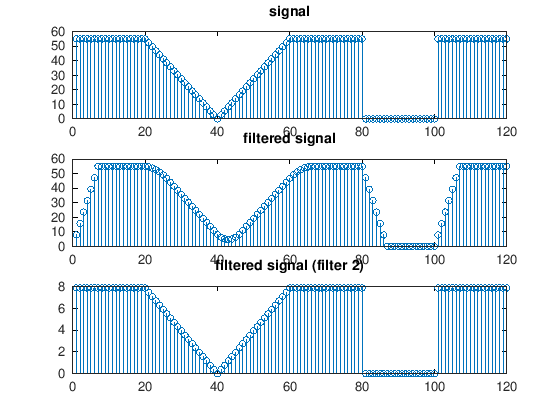

In [38]:
b_7 = ones(1,7)/7;

yy = filter(b_7,1,simple); 
y2 = filter2(b_7,simple,'same'); 


subplot(3,1,1)
stem(simple)
title('signal')


subplot(3,1,2)
stem(yy)
title('filtered signal')


subplot(3,1,3)
stem(y2)
title('filtered signal (filter 2)')

# Lab session VI : Finite Impulse Response (FIR) Filters

## Introduction

Up to now, we have focused our attention on signals and their mathematical representations. In this lab, we begin to emphasize systems or filters. In signal processing, **a filter is a system** (usually a linear and time-invariant system - a SLIT) which transforms an input signal in an output signal with modified characteristics. The general concepts of **linearity** and **time invariance** completely characterize a wide class of systems that are exceedingly important in both the continuous-time and the discrete-time cases.

Strictly speaking, is a system that is designed to remove some component or modify some characteristic of a signal, but often the two terms (filter and system) are used interchangeably. 

In this lab, we introduce the class of finite impulse response (FIR) systems, or, as we often refer to them, FIR filters. These filters are systems for which each output value is the sum of a finite number of weighted values of the input sequence. We define the basic input–output structure of the FIR filter as a time-domain computation based upon what is often called a difference equation. 

For linear and time-invariant systems, the output signal is the result of the **convolution** between the input signal and the **impulse response** of the system. The unit impulse response of the filter is defined and shown to completely describe the filter via the operation of convolution. 

For digital systems, with x[n] and b[n] are respectively the input signal and the impulse response of the system, sampled at a frequency $f_s = \frac{1}{T_s} $, this convolution takes the form : 
$$
y[n] = (x*b)[n] = \sum\limits_{m =  - \infty }^{ + \infty } {b[m]\;x[n - m]\;T_S }
$$
In the following, we will be dealing with **finite impulse response (FIR) filters**, for which this equation reduces to a simplified, finite difference equation, where M~1~ and M~2~ are positive integers :
$$
\displaylines{
  y[n] = \sum\limits_{m =  - M_1 }^{M_2 } {b[m]\;x[n - m]} \; \cr 
   = b[ - M_1 ]\,x[n + M_1 ] + ... + b[ - 1]\,x[n + 1] +  \cr 
  \quad b[0]\,x[n] + b[1]\,x[n - 1] + ... + b[M_2 ]\,x[n - M_2 ] \cr}
$$
We will also restrict to **causal filters**, which means that we will only use **past values of the input** (x[n-m] with m>0) to compute the current value of the output y[n], so that this difference equation further reduces to the simple form :
$$
\displaylines{
  y[n] = \sum\limits_{m = 0}^{M_2 } {b[m]\;x[n - m]} \; \cr 
   = b[0]\,x[n] + b[1]\,x[n - 1] + ... + b[M_2 ]\,x[n - M_2 ], \cr}
$$
where M~2~ is the order of the causal FIR filter, which is thus completely determined by the $M^2+1$ values of the coefficients b[m] of its impulse response. This difference equation tells us how to compute each sample of the output signal y[n] as a weighted sum of samples of the present and past values of the input signal x[n]. 

Only causal filters can be implemented in real time, non-causal filters require the storage of all the values of the input signal beforehand, the filtering processes being performed “afterwards”, *i.e.* already knowing the entire original signal before processing. 


## Problem 6.1 : Implementing the running convolution algorithm

In a first step, you will modify the running correlation function that you have developed in a previous lab. Convolution is very close to correlation, it only differs by a mere time inversion on one of the second signal. Therefore, all you have to do is to invert the elements of the reference signal y[n] and to remove the complex conjugation.

|                         Correlation                          |                         Convolution                          |
| :----------------------------------------------------------: | :----------------------------------------------------------: |
| $r\left[ n \right] = \sum\limits_{k =  - \infty }^{ + \infty } {x\left[ k \right]} \,\;y^*\left[ {k - n} \right]\; \\ = \sum\limits_{k =  - \infty }^{ + \infty } {x\left[ {k + n} \right]} \,y^*\left[ k \right]$ | $y[n] = \sum\limits_{k = 0}^M {x\left[ k \right]\;y[n - k]} \; \\ = \sum\limits_{k = 0}^M {x\left[ k \right]\;y\left[ { - \left( {k - n} \right)} \right]} $ |

By adding this inversion, you will easily transform *correl(x,y)* in *convol(x,y)*. In the following exercise, you will verify that the convolution with a gaussian corresponds to a sliding mean, which introduces some blurr in the x signal. 

1. **Gaussian function :** Write a new function *mygauss(x,mu,var)* which generates a vector *y* with the elements of a gaussian of mean *mu* (m) and variance *var* ($\sigma^2$) for all the values of the input x, using the bijection $y= e^{\frac{-(x-\mu)^2}{2\sigma^2}}$. 
   Using this function, generate a vector *y* on the domain [0,50] containing a sampled gaussian centered on $x=25$ and of $\sigma^2=0.25$, and plot it in the top graph of a figure containing three graphs (at the end).

2. **Signal x :** Loads the contents of the data file *Lab6_data.mat* into your Octave environment. You should have loaded the array *sunspot*, which holds in its second column the mean integrated intensity of the solar sunspots for the last 300 years, with respect to the year (in column 1). Linked to solar activity, these sunspots exhibit a peak intensity approximately every eleven years, as you could verify using an autocorrelation or the DFT (the subject of next lab).

   Build a vector *x* with the sunspot intensities of the second line of *sunspot*, plot these intensity variations in the central graph of the figure.

   ![Sunspots](https://amubox.univ-amu.fr/s/ERdcxja4pnft6KR/preview)

3. **Convolution between x and y :** Use your newborn function *convol* to compute the (discrete) convolution between x and y, and plot the result in the bottom graph. 

4. **Effect of the Gaussian width :** Calculate the convolution between x and y for several values of the variance, $\sigma^2= 0.5$, then $\sigma^2= 1$. 

In [3]:

load lab6_data

In [4]:
function y = gaus(x,mu,var)
    
    y = exp(-(x-mu).^2./(2*var^2));

end


In [5]:
function R = convol(x,y,Ts)

nx = length(x);
ny = length(y);

N = nx + ny;

buffer = zeros(1,ny);

x = [x,buffer];
buffer_index = 2:length(buffer);
R = zeros(1,N);

for i = 1:N
    buffer = [buffer(buffer_index),x(i)];
    R(i) = sum( fliplr(buffer) .* y) * Ts;
end

end


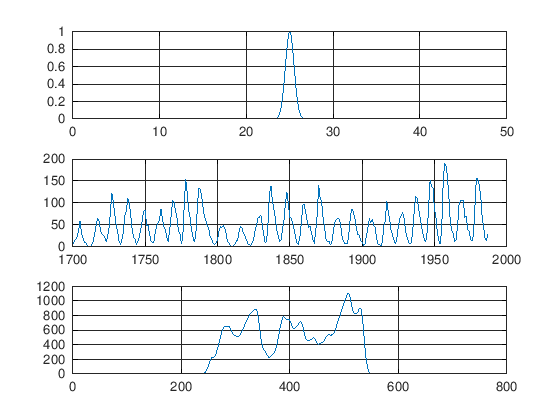

In [6]:
subplot(3,1,1)
x = 0:0.1:50;
y = gaus(x,25,sqrt(0.25));
plot(x,y)
grid on

subplot(3,1,2)
plot(sunspot(:,1),sunspot(:,2))
grid on 

subplot(3,1,3)

convolution = convol(y,sunspot(:,2)',1);

plot(convolution)
grid on 


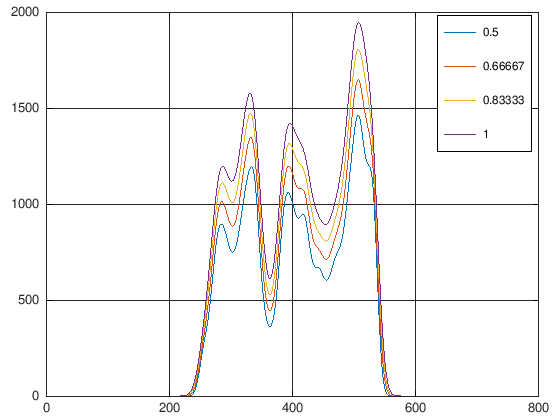

In [7]:
x = 0:0.1:50;

i = 1;
N = 4;
leg = [];


for w=linspace(0.5,1,N)

    y = gaus(x,25,sqrt(w));
    convolution = convol(y,sunspot(:,2)',1);
   
    
    plot(convolution)
    hold on
    grid on 
    leg = [leg;num2str(w)];
   
    i = i + 1;

end
legend(leg)

## Problem 6.2 : Extraction of a sinusoidal component using selective FIR filtering

You will apply a purpose-built FIR filter to **extract a particular sinusoid** at the frequency $f_0$ from a signal affected by noise and which contains other sinusoids at various frequencies. 

The main question is how to choose the right impulse response to get as an output of the FIR filter the expected sinusoid at the right frequency $f_0$, supposed to be effectively present in the input signal. Take a moment to think about it : Remember that convolution is close to correlation, itself a sliding scalar product…  

After some thoughts, it seems logical that the impulse response should be similar to the expected output signal. We will thus use a trial impulse response in the form of :
$$
b[k = 0,M] = \sin \left( {2\pi f_0 k} \right)\,
$$
where M is the order of the FIR filter





1. **Signal x :** On a one second domain, generate the signal x\[n\] made of the sum of two sinusoids of the same amplitude 1 at frequencies $f_0=10 Hz $ and $f_0 =15 Hz$, using a sampling frequency $f_s$ such that x\[n\] contains $2^10$ points. 


fs = 1024


T = 1


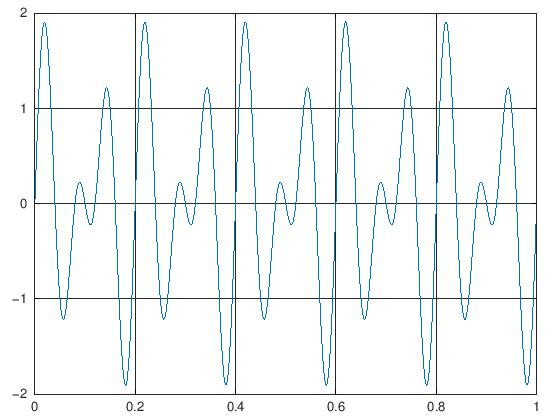

In [8]:
%exc 1
fs=2^10
T = 1
N = 1*fs;

Ts = 1/fs;

t = linspace(0,T-Ts,N) ;

f1 = 10;
f2 = 15;
x = sin(2*pi*f1*t) + sin(2*pi*f2*t);
plot(t,x)
grid on 


2. **Impulse response of the FIR filter :** Keeping the same sampling frequency, generate the coefficients 
   $b_k$ of the desired impulse response, taking in a first step $M=2^7$. 


In [9]:
%exc2 #
M = 2^7;
k_vec = (0:M)*Ts;
b = sin(2*pi*f1*k_vec);

3. **Signal filtering :** Use the function _convol_, to realize the FIR filtering of _x\[n\]_ using as y a vector _b_ containing the coefficients of the FIR filter determined by the above expression.


In [10]:
convolution1 = convol(x,b,Ts);

4. **Results :** In a three graph figure, plot the signal x\[n\], the filter coefficients b\[k\], and finally the filtered signal _x\_filt_. What is the apparent frequency of the filtered signal ? 
   \(Suggestion : for a precise determination use your function _apfc_ or the DFT\).



n_x = 1024


n_b = 129


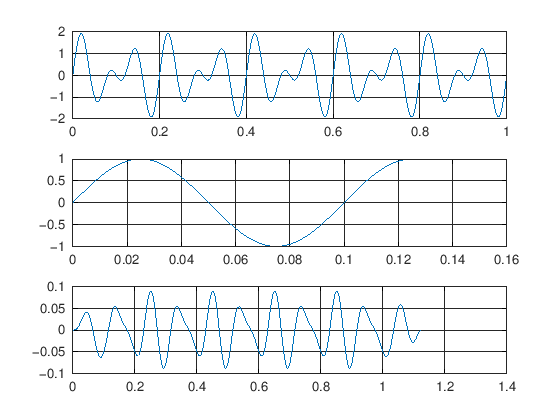

In [11]:
subplot(3,1,1)

plot(t,x)
grid on 

subplot(3,1,2)


time_support_b = (0:length(b)-1)*Ts;
plot(time_support_b,b)
grid on

subplot(3,1,3)


n_x = length(x)
n_b = length(b)
%time_support_conv = (0:(length(convolution1)-1))*Ts;
time_support_conv = (0:(n_x+n_b-1))*Ts;
plot(time_support_conv,convolution1)
grid on 

In [12]:
function [out] = sc_prod(s,r,del_T)

N = length(s);
if N != length(r)
    disp('no matching length')
end

Ts=del_T/N;

S =sum ( s .* conj(r) );

out = S*Ts;


endfunction

In [13]:
function [A,P,f0,fk_arr] = apcf(s_vec,t)

del_T = t(end) - t(1); 
N = length(s_vec);
Ts= del_T/N;


kmax = round(N / 2);
fk_arr = zeros(1,kmax);

for k = 1 : kmax 
   
  
   fk = k / del_T;
   r = exp(1i*2*pi*t*fk);
   scprod = sc_prod(s_vec,r,del_T);
   fk_arr(k) = abs(scprod);


end


maxspec = max(fk_arr);
k_fin = find( fk_arr  == maxspec);
f0 = k_fin/del_T;

r = exp(1i*2*pi*t*f0);

scprod = sc_prod(s_vec,r,del_T);

A = 2/del_T*abs(scprod);
P = angle(scprod);

endfunction

In [14]:

[A,P,f0,fk_arr] = apcf(convolution1,time_support_conv);
f0

f0 = 9.7778


5. **Visualization of the FIR impulse response :** The instruction `[H,w]=freqz(b,1,nu];` furnishes the frequency response over n points for a discrete pulsation $\omega = 2 \pi \nu$ between 0 and $\pi$, thus a discrete \(normalized\) frequency between 0 and $f_{Ny}=\frac{f_e}{2}$, the Nyquist frequency \(remember that the discrete frequency of a discrete signal is given by $\nu=\frac{f_0}{f_e}$\). 
   To get back to usual \(continuous\) frequencies, you can replace _nu_ by a vector containing explicitely the values of the discrete pulsation for which you want to know H\(w\). 
   For example, the instruction `H=freqz(b,1,[f0 f1]*2*pi/fe);` returns a doublet with the values of H at $f_0$ and at $f_1$. 
   In a two\-graph figure, plot modulus and phase of the frequency response H\(f\) of your FIR filter in a frequency domain between 0 and 100 Hz.


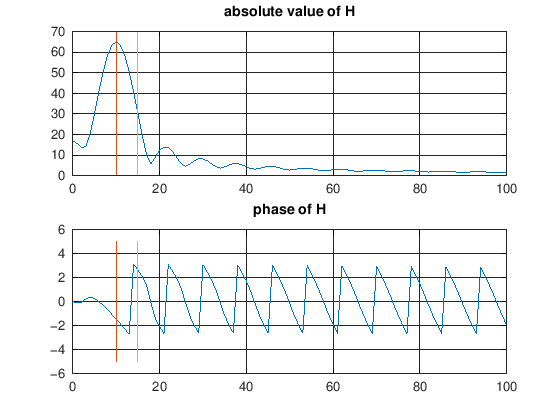

In [15]:
[H,w] = freqz(b,1);

%output w is normalized angular freqency can be turned into regular frequeny
f_vec = w*fs/(2*pi);

subplot(2,1,1)

plot(f_vec,abs(H))
grid on
xlim([0,100])
hold on
title('absolute value of H')


%vertical lines
plot([f1,f1],[0,70])
hold on
plot([f2,f2],[0,70])

subplot(2,1,2)


plot(f_vec,angle(H))
title('phase of H')
xlim([0,100])
grid on 

%vertical lines
hold on
plot([f1,f1],[-5,5])
hold on
plot([f2,f2],[-5,5])

0## 6. **Rejection factor :** The quantity defined by $R=\frac {H(f_0)}{H(f_1)}$ gives a simple criterion to appreciate the selectivity of a filter, its ability to select more or less the right sinusoid. Filters with high R will be more effective in discriminating between sinusoidal components at frequencies $f_0$ and $f_1$, _e.g._ 10 and 15 Hz. In the preceding figure, add a stem to identify on the modulus |H\(f\)| the two values $|H(f_0)|$ and $|H(f_1)|$, and computes the corresponding rejection ratio.



In [16]:
H = freqz(b,1,[f1 f2]*2*pi/fs)
R = abs(H(1))/abs(H(2))
%not sure about the absolute values 

H =

    8.139 - 64.500i  -26.513 + 14.177i



R = 2.1623


7. **Optimization of the order M of the FIR filter :** Compare the modulus $|H_M(f)|$ corresponding to various input responses with $M=2^n$ for n=4 up to 9, and compute the corresponding rejection ratios. Plot these ratios _w.r.t._ n in a multi\-graph figure, which will also contain the modulus of the various frequency responses $|H_M(f)|$ and the stem on the particular values $|H(f_0 )|$ and $|H(f_1)|$.



N = 2048


R_arr =

   1.0324
   1.1522
   1.2306
   2.1079
   6.9393
   9.8136



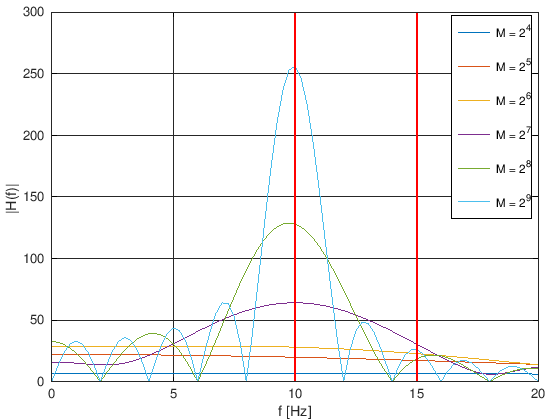

In [27]:
N = 2^11 %number of points the the frequency spectrum is evamuated at 
n = 4:9;
M = [2^4,2^5,2^6,2^7,2^8,2^9,];
H_pl = zeros(6,N);



leg = [];

for i = 1:6

k_vec = (0:M(i)-1)*Ts;
b = sin(2*pi*f1*k_vec);

H(i,:) = abs(freqz(b,1,[f1 f2]*2*pi/fs));

[H_tmp,w] = freqz(b,1,N); %only the frequency interval until 20hz is interreseting 
H_pl(i,:) = H_tmp;

leg = [leg;'M = 2^', num2str(n(i))];

%plot((abs(H_pl)))
    


end
f_vec = w*fs/(2*pi);
plot(f_vec,abs(H_pl))

legend(leg)
xlabel('f [Hz]')
ylabel('|H(f)| ')
grid on 
xlim([0,20])

hold on 
plot([f1,f1],[0,300],'r-','LineWidth',5)
hold on
plot([f2,f2],[0,300],'r-','LineWidth',5)

R_arr = (H(:,1)) ./ (H(:,2))

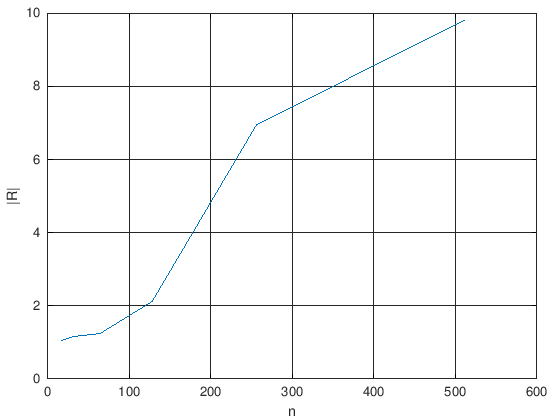

In [29]:
plot(M,R_arr)
grid on
xlabel('n')
ylabel('|R|')

8. **Food for thought :** A clever way to increase the rejection ratio without increasing the length of b\[n\] would be to localize $|H(f_1)|$ in the first zero of the _sinc_. Find the ideal order M fulfilling this goal. 



M = 205.80


R_arr = 2.0849e+04


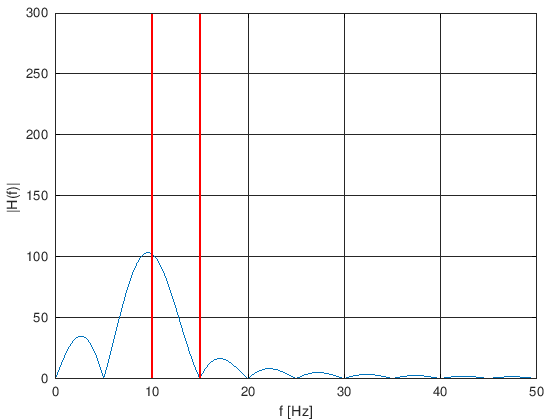

In [18]:
N = 2^13; %number of points the the frequency spectrum is evamuated at 

M = (1/5)/Ts+1 %setting M to the values such that b has the deisred length 1/5s (and + 1 so we can keep the rest of the cell as before)







k_vec = (0:M-1)*Ts;
b = sin(2*pi*f1*k_vec);

H = abs(freqz(b,1,[f1 f2]*2*pi/fs));

[H_pl,w] = freqz(b,1,N); 






f_vec = w*fs/(2*pi);
plot(f_vec,abs(H_pl))


xlabel('f [Hz]')
ylabel('|H(f)| ')
grid on 
xlim([0,50])

hold on 
plot([f1,f1],[0,300],'r-','LineWidth',5)
hold on
plot([f2,f2],[0,300],'r-','LineWidth',5)

R_arr = (H(:,1)) ./ (H(:,2))

The sinc is coming from the rect window in the time domain.
we know the width of the rect is the inverse of the first 0 of the sinc (property of fourier transform) 
Since our sinc in frequemcy space is centered around 10 and we want the sinc to be 0 at 15 we need b to be windowed by a rect with the width of 1/5s
This gives an R value around 2000 which is way higher than we what we saw for bigger M values before

9. **Robustness of the FIR filter :** Taking $M=2^8$, test the filter capability to operate in a noisy environment, by adding to the signal _x\[n\]_ some random additive gaussian noise. 



N = 1024


n_x = 1024


n_b = 257


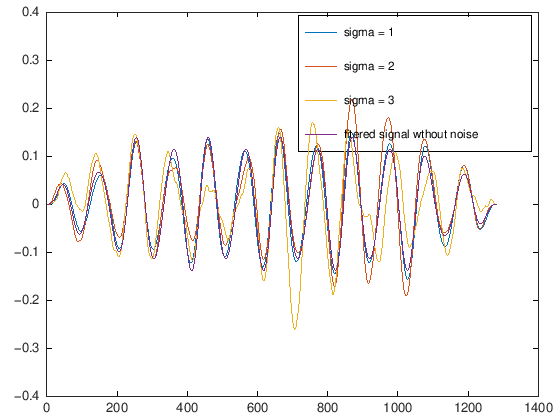

In [19]:
%exc

M = 2^8;
k_vec = (0:M)*Ts;
b = sin(2*pi*f1*k_vec);

leg = [];

N_itt = 3;  %number if itterations of the loop
sig_step = 1; %increase of sigma for eachs step

M = zeros(3,N_itt);
N =length(x)

n_x = length(x)
n_b = length(b)

time_support_conv2 = (0:(n_x+n_b-1))*Ts;

for i=1:N_itt %Loop to itterate for differnt sigma values 

   
    sigma = i*sig_step;        
    leg = [leg;'sigma = ', num2str(sigma)];
    x_noise = x + randn(1,N) * sigma^2;     %overlap original signal with noise
    convolution2 = convol(x_noise,b,Ts);
    plot(convolution2)
    hold on 

end



plot(convol(x,b,Ts),'-','LineWidth',2)

leg=[leg;'fitered signal wthout noise'];

legend(leg)



%we can see the frequency filtering is quite stable to noise since even for noisy signals the filterd signal resembles the one without noise closely

## Problem 6.3 : "*Off-line*" 1D-signal filtering with GNU Octave/MatLab

### Introduction

Although we know how to do it using running convolution, It is not always necessary to filter signals in real time. Signals can be stored in computer memory, then they may be processed and filtered a posteriori ("*Off-line*" filtering), as is often the case for images and 2D-filtering. 

Before going further, please read carefully the pages "*Additional notes for Lab session VI : Finite Impulse Response (FIR) Filters*". 

### Noise reduction in 1D signals

From the data file *Lab6_data.mat*, the signal “*simple*” should be available, a noise-free 1D signal, as well as “*simple_noise*”, the same signal corrupted by a random noise. 

### Effect of delay :

1. Let’s examine the delay introduced by the two filtering implementations, _filter_ and _filter2_. Filter _simple_ with a 7\-point running average filter. Do this twice, first using _filter_ and then using _filter2_ with the “_same_” parameter\[[1\]](#_ftn1). Pay attention to the fact that _simple_ is a column vector. 
2. In a figure with three graphs, plot \( _stem_ \) the original and the two filtered signals.
3. One of the filtering commands introduce some delay. Which one ? How many samples of delays have been introduced ?
4. Compute the RMS error between the original and the two filtered signal. Which one is lower ? Why ?

------

[[1\]](#_ftnref1) Use the “*same*” parameter every time you filter a signal using *filter2* in the remainder of this lab. 



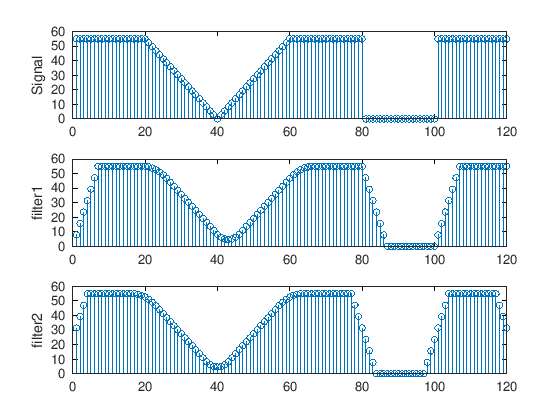

In [42]:
b = ones(7,1)/7;

y1 = filter(b,1,simple);
y2 = filter2(b,simple,'same');

subplot(3,1,1)
stem(simple)
ylabel('Signal')

subplot(3,1,2)
stem(y1)
ylabel('filter1')

subplot(3,1,3)
stem(y2)
ylabel('filter2')


In [43]:
[tmp,index_min_s] = min (simple(1:70))
[tmp,index_min_f] = min (y1(1:70))
[tmp,index_min_f2] = min (y2(1:70))
%the filtered signal is delayed by 3 samples (half of the length of the filter)

tmp = 0
index_min_s = 40


tmp = 4.7143
index_min_f = 43


tmp = 4.7143
index_min_f2 = 40


In [53]:
function out = rms(xx,yy)

out = sqrt(sum((xx-yy).^2)/length(xx));

endfunction



In [44]:
rms(simple,y1)
rms(simple,y2)


out = 12.662
ans = 12.662


out = 6.6065
ans = 6.6065


#### Running 1D average filters

1.Use again filter2 to apply a 3\-point, a 5\-point, and a 9\-point moving average filter to the noisy signal simple\_noise.

2.Use two subplot instructions to plot the original signal, the three filtered signals, and the three sets of filter coefficients in seven panels of a single figure \(use plot for the signals and stem for the coefficients\).

3.Compute the RMS error between each filtered signal and simple.

4.Which one of the four moving\-average filters that you have applied has the lowest RMS error 


In [50]:
b3 = ones(3,1)/3;
b5 = ones(5,1)/5;
b9 = ones(9,1)/9;

filt3 = filter2(b3,simple_noise,'same');
filt5 = filter2(b5,simple_noise,'same');
filt9 = filter2(b9,simple_noise,'same');

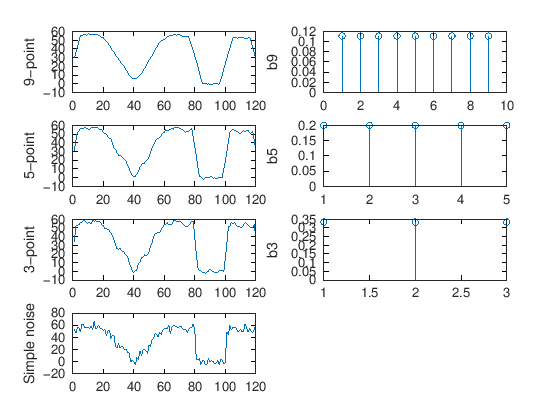

In [51]:
subplot(4,2,1)
plot(filt9)
ylabel('9-point')

subplot(4,2,2)
stem(b9)
ylabel('b9')

subplot(4,2,3)
plot(filt5)
ylabel('5-point')

subplot(4,2,4)
stem(b5)
ylabel('b5')

subplot(4,2,5)
plot(filt3)
ylabel('3-point')

subplot(4,2,6)
stem(b3)
ylabel('b3')

subplot(4,2,7)
plot(simple_noise)
ylabel('Simple noise')

#### “*Tapered*” smoothing 1D filters

1. Use the file *g_smooth.m* (provided in the file "*Lab6_Material.zip*") to generate filter coefficients with “widths” of 0.5, 0.75 and 1.0. Note the lengths of the returned coefficient vectors, plot them in a single figure to get a sense of how the “width” factor affects them. Use *filter2* to apply these filters to *simple_noise*. 
2. Plot the three filtered signals and the three sets of coefficients in a figure with six panels. 
3. Compute the RMS error between simple and each of the filtered signals.
4. Which filter has the lowest RMS error ? 



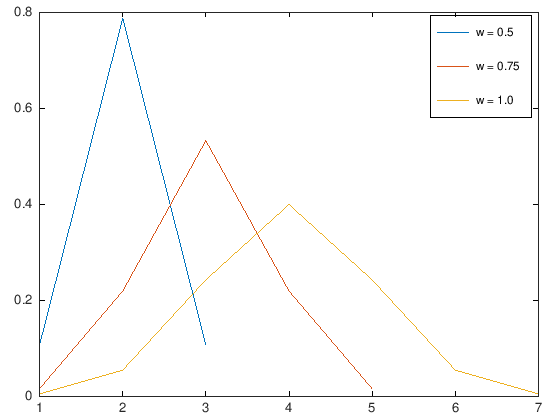

In [67]:
b_s1 = g_smooth(0.5);
b_s2 = g_smooth(0.75); 
b_s3 = g_smooth(1.0);

plot(b_s1)
hold on
plot(b_s2)
hold on
plot(b_s3)
grid on

legend('w = 0.5','w = 0.75','w = 1.0')



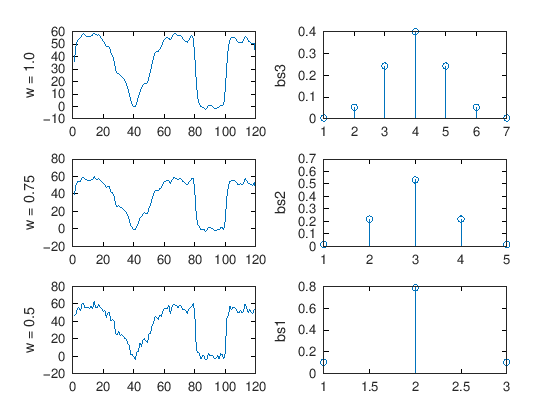

In [69]:
y_s1 = filter2(b_s1,simple_noise,'same');
y_s2 = filter2(b_s2,simple_noise,'same');
y_s3 = filter2(b_s3,simple_noise,'same');

subplot(3,2,1)
plot(y_s3)
ylabel('w = 1.0')

subplot(3,2,2)
stem(b_s3)
ylabel('bs3')

subplot(3,2,3)
plot(y_s2)
ylabel('w = 0.75')

subplot(3,2,4)
stem(b_s2)
ylabel('bs2')

subplot(3,2,5)
plot(y_s1)
ylabel('w = 0.5')

subplot(3,2,6)
stem(b_s1)
ylabel('bs1')



In [70]:
rms(simple,y_s1)
rms(simple,y_s2)
rms(simple,y_s3)


ans = 3.8642


ans = 4.1171


ans = 4.6322


#### Non-linear filtering of a spiky signal

1. Generate a “spiky” signal starting from the signal *simple* by replacing its current values by 250 at the indices n=20, 60, and 90. 
2. Filter the spiky signal using a 1D tapered smoothing filter with a width of 0.5.
3. Filter the spike signal using a non-linear median filter with N=5, and plot the three signals in a single figure. 



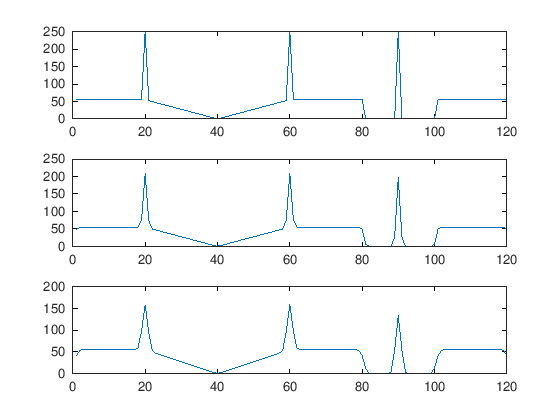

In [71]:
simple_spike = simple;
simple_spike([20,60,90])=250;

stem(simple_spike)
% we saw in the earlier exercise that the filter with width 0.75 has N=5


filt1 = g_smooth(0.5);
filtered_spike_1 = filter2(filt1,simple_spike,'same'); 

filt2 = g_smooth(0.75);
filtered_spike_2 = filter2(filt2,simple_spike,'same'); 

subplot(3,1,1)
plot(simple_spike)

subplot(3,1,2)
plot(filtered_spike_1)

subplot(3,1,3)
plot(filtered_spike_2)




### Differentiation and edge-finding of 1D signals 

##### Applying a difference filter 

Use a differentiating filter characterized by $b_k = [-1 1]$ to the signal *simple*. Plot the filtered signal, find the location of the non-zero “features” of this signal, and make the link with what they correspond to in the original signal. 



diff_filt = [-1,1];
filtered_diff = filter(diff_filt,simple); 
stem(filtered_diff)

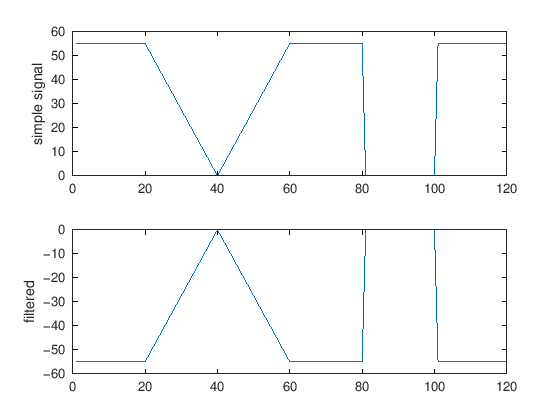

In [73]:
bdiff = [-1 1];

ydiff = filter2(bdiff,simple,'same');

subplot(2,1,1)
plot(simple)
ylabel('simple signal')
subplot(2,1,2)
plot(ydiff)
ylabel('filtered')
%mirrors the signals

## Conclusions

Complete this cell with your personal conclusions about what you've learned. Give an estimation on the time you've spent (outside the alloted time for lab sessions) realizing this lab session.